# 多元线性回归-多因素预测医疗费用

In [44]:
# 导入相关库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
# 导入数据
data=pd.read_csv("./data/insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 数据预处理
data.info()
#观察可知没有缺失数据

#采用独热码构造哑变量
data=pd.get_dummies(data,drop_first=True)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [29]:
# 分离自变量和因变量
X=data.drop(["charges"],axis=1)
Y=data.loc[:,"charges"]
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
# 特征缩放
scX=StandardScaler()
scY=StandardScaler()
x_train=scX.fit_transform(x_train)
x_test=scX.transform(x_test)
y_train=np.ravel(scY.fit_transform(y_train.values.reshape(-1,1)))

In [31]:
# 分离训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [33]:

#实例化模型开始训练
reg=LinearRegression()
reg.fit(x_train,y_train)
# 对测试集生成预测结果
y_pre=reg.predict(x_test)
# 进行r2评分
r2_score(y_test,y_pre)


0.7365988602702164

In [39]:
# 获取模型表达式
print("Y=",end="")
for i in range(len(x_train.columns)):
    print("{0:.2f}*{1} + ".format(reg.coef_[i],x_train.columns[i]),end="")
print(reg.intercept_)

Y=252.28*age + 338.27*bmi + 505.98*children + 57.49*sex_male + 23813.86*smoker_yes + -421.92*region_northwest + -937.66*region_southeast + -775.22*region_southwest + -11918.57246279455


### 画出吸烟和医疗费用之间的小提琴图
*[小提琴图详解](https://zhuanlan.zhihu.com/p/376055263)*
![](https://gitee.com/CH3-Orange/ogci-profe-rutcip/raw/master/img/20211013130618.jpg)

<AxesSubplot:xlabel='smoker_yes', ylabel='charges'>

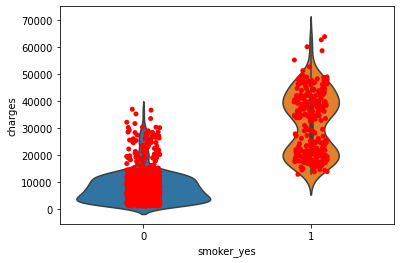

In [46]:
# 画出吸烟与医疗费用的小提琴图

sns.violinplot(x='smoker_yes', y='charges', data=data)
sns.stripplot(x='smoker_yes', y='charges', jitter=True, color='red', data=data)

### 观察小提琴图可知，不吸烟的人医疗费用几乎都在20000以内均小于吸烟人群的医疗费用